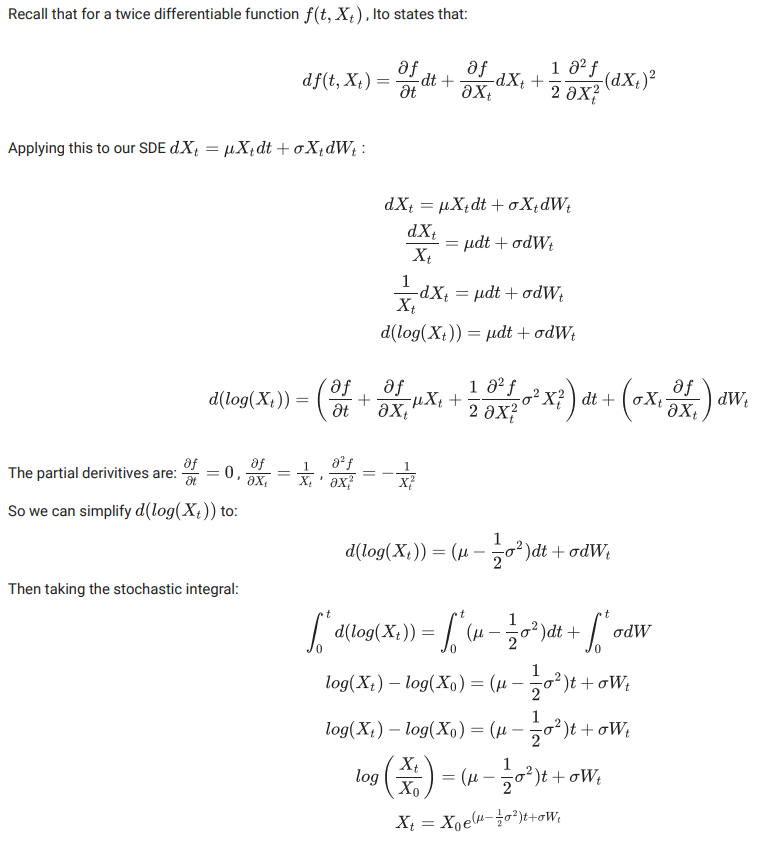

In [1]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import time
import math
display.Image("ito2.png")

In [2]:
class optionPricing:
    def __init__(self,S0,K,T,r,sigma, iterations):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.iterations = iterations
    def call_option(self):
        data = np.zeros([self.iterations,2])
        rand = np.random.normal(0,1,self.iterations)
        S = self.S0*np.exp(self.T*(self.r - 0.5*sigma**2)+self.sigma*np.sqrt(self.T)*rand)
        data[:,1] = S - self.K
        average = np.sum(np.amax(data, axis = 1))/float(self.iterations)
        return np.exp(-1.0*self.r*self.T)*average
    def dcall_option(self,Premium):
        data = np.zeros([self.iterations,2])
        rand = np.random.normal(0,1,self.iterations)
        S = self.S0*np.exp(self.T*(self.r - 0.5*sigma**2)+self.sigma*np.sqrt(self.T)*rand)
        S = np.sort(S)
        return S,np.where(S > self.K, S-self.K - Premium , - Premium)

10.438960239526061


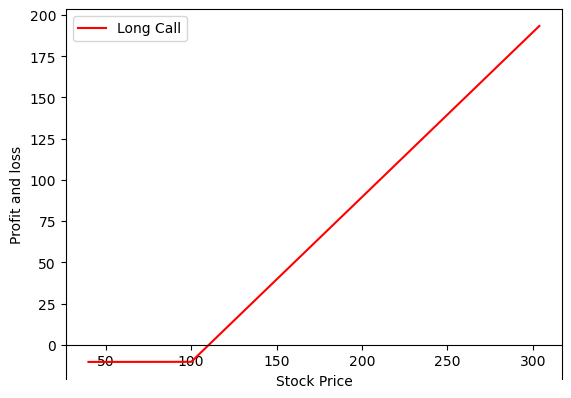

In [3]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
iterations = 1000000
model = optionPricing(S0,K,T,r,sigma,iterations)

premium = model.call_option()
print(premium)
S, Payoff = model.dcall_option(premium)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,Payoff,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


In [4]:
https://www.qmr.ai/what-is-expected-shortfall-cvar/
https://www.quantrocket.com/code/?repo=quant-finance-lectures&path=%2Fcodeload%2Fquant-finance-lectures%2Fquant_finance_lectures%2FLecture40-VaR-and-CVaR.ipynb.html
https://github.com/quantrocket-codeload/quant-finance-lectures/tree/master/quant_finance_lectures
https://github.com/quantrocket-codeload/quant-finance-lectures/blob/master/quant_finance_lectures/Lecture44-ARCH-GARCH-and-GMM.ipynb
https://www.youtube.com/watch?v=vaFwbdZqMfc
https://madisoninvestments.com/resources/interest-rate-risk-understanding-duration-convexity
https://www.financehomie.com/index.php/2022/09/13/a-comprehensive-list-of-fixed-income-interview-questions/
https://www.codingninjas.com/codestudio/library/credit-analyst-interview-questions
https://in.indeed.com/career-advice/interviewing/credit-risk-interview-questions

<class 'SyntaxError'>: invalid decimal literal (<ipython-input-4-434183a9c803>, line 2)

Text(0.5, 1.0, 'Geometric Brownian Motion')

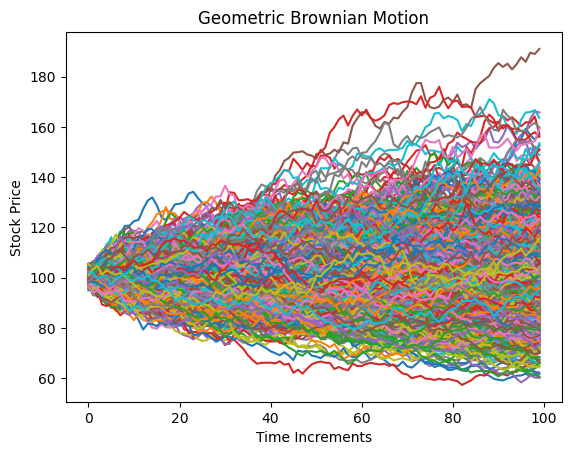

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    """
    dt = T/steps
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.0 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [10]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call


In [11]:
N=100000
paths= geo_paths(S, T, r, q,sigma, steps, N)
S = np.sort(paths[-1])
payoffs = np.maximum(S-K, 0)
option_price = np.exp(-r*T)*np.mean(payoffs)

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")



Black Scholes Price is [ -0.20671748  -0.26204574  -0.26240741 ... 100.64573628 100.8312882
 113.23923477]
Simulated price is 4.213565762461153


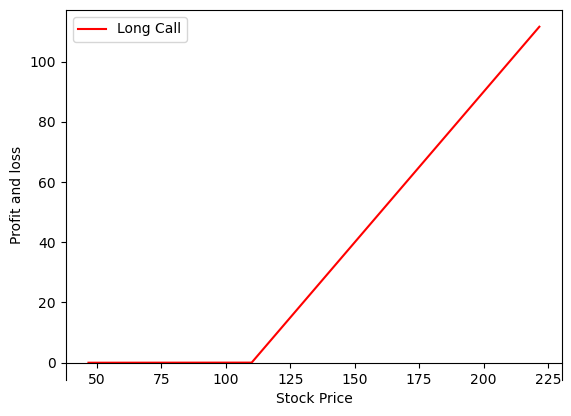

In [12]:
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(S,payoffs,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

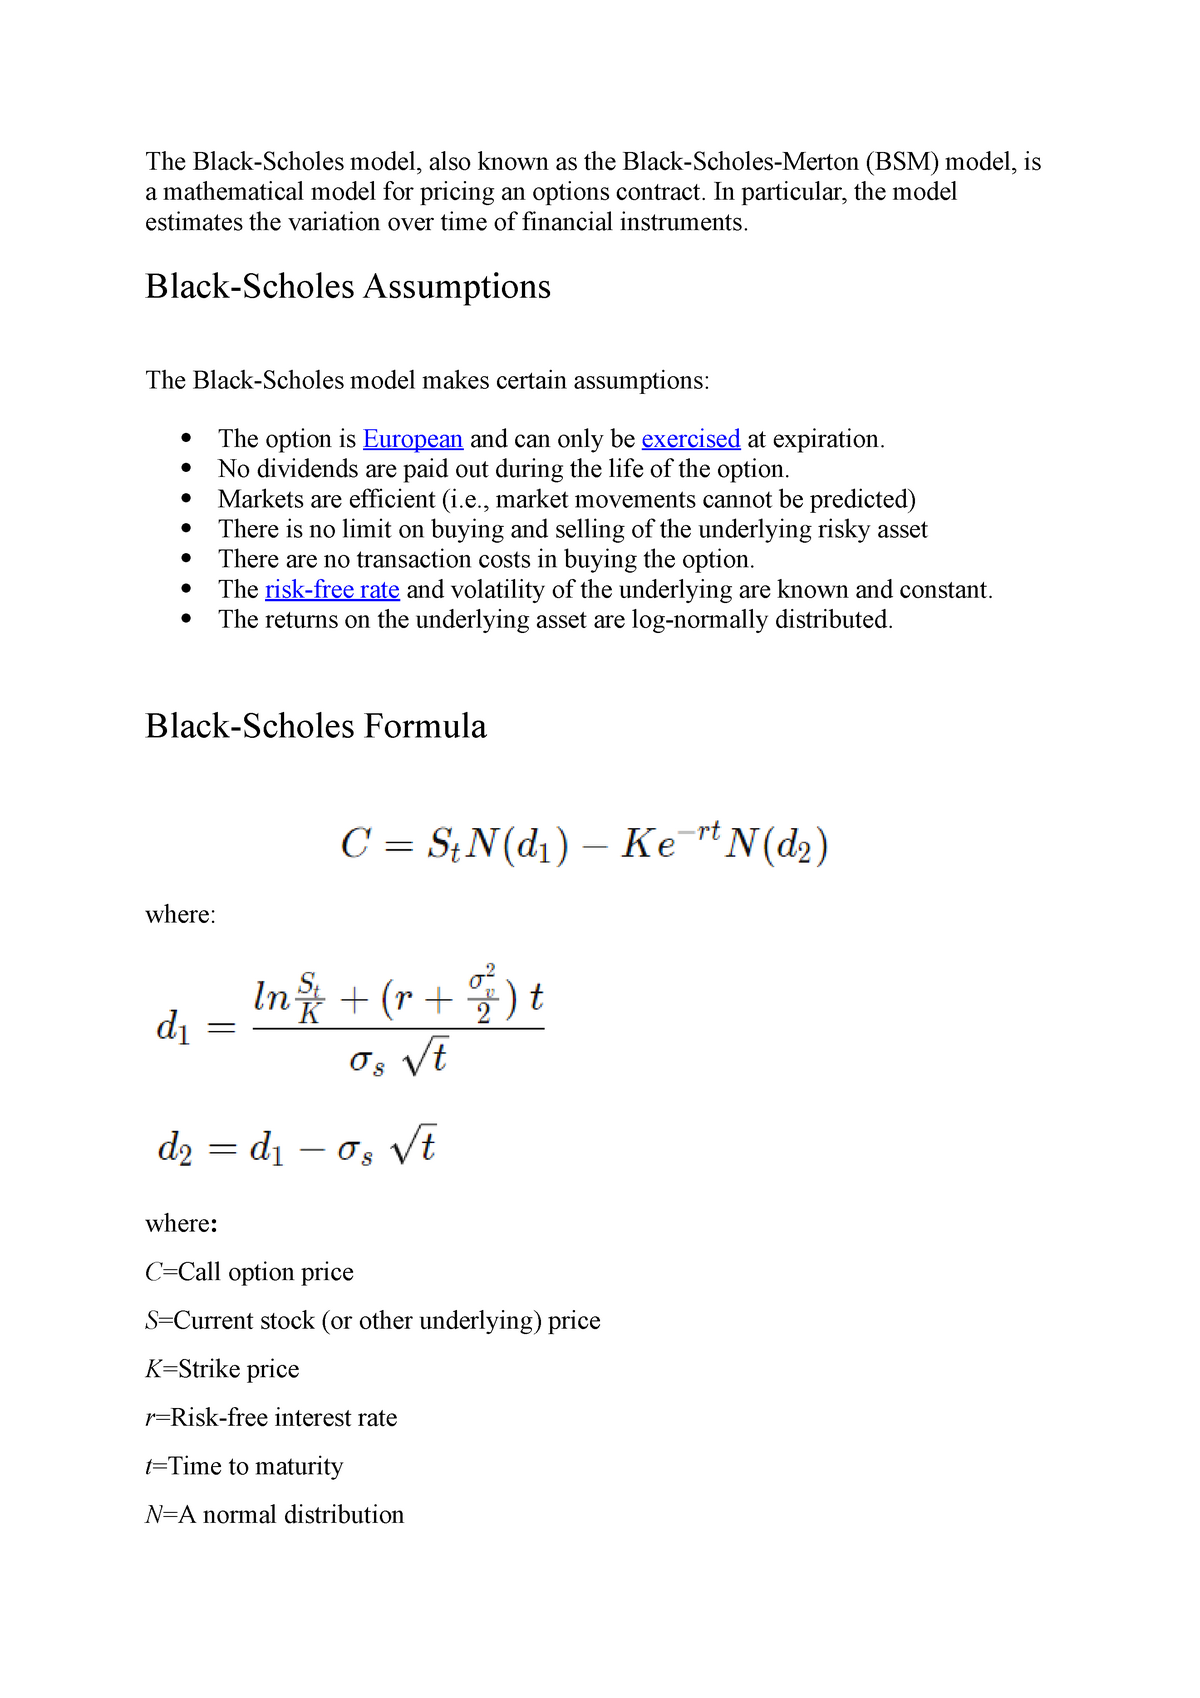

In [13]:
display.Image("thumb_1200_1698.png")